In [2]:
import sys
sys.path.append('../')
import atlas

import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Solar Model with ATLAS

This is the simplest use case for `BasicATLAS` that calculates the structure and emergent spectrum of a Sun-like star ($T_\mathrm{eff}=5770\ \mathrm{K}$, $\log(g)=4.44$, [standard solar abundances](http://atmos.ucsd.edu?p=solar)).

We will use `~/ATLAS_sun_model` as our working directory. First, make sure the folder does not already exist:

In [3]:
rm -rf ~/ATLAS_sun_model

## Structure

The structure must be calculated first using `ATLAS-9` which is dispatched with `atlas.atlas()`. In the absence of arguments, the routine will default to solar parameters listed above as well as a set of solar opacity distribution functions provided in `data/solar_ODF`.

In [4]:
run_dir = os.path.expanduser('~/ATLAS_sun_model')
atlas.atlas(run_dir)

Launcher created
Starting automatic iterations...
15 iterations completed: max[abs(err)] = 0.177 | max[abs(de)] = 47.288
30 iterations completed: max[abs(err)] = 0.17 | max[abs(de)] = 2.59
ATLAS-9 halted

Final convergence: max[abs(err)] = 0.17 | max[abs(de)] = 2.59
Saved the model in model.dat
Finished running ATLAS-9 in 0:01:42.090270 s


We can now plot the calculated temperature/pressure profile with `MatPlotLib`:

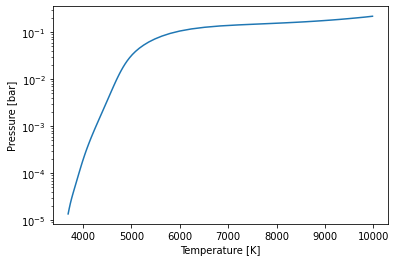

In [5]:
temp, press = np.loadtxt(run_dir + '/model.dat', delimiter = ',', unpack = True, usecols = [1, 2])

plt.plot(temp, press)
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.yscale('log')

## Spectral Synthesis

The emergent spectrum corresponding to the structure calculated above is synthesized with a satellite utility called `SYNTHE`. `SYNTHE` is dispatched in the cell below between the wavelengths of $100$ Å and $3000$ Å.

*The calculation may take a few hours*

In [6]:
atlas.synthe(run_dir, 200, 2600)

Adapted the ATLAS-9 model to SYNTHE in output_synthe.out
Launcher created
SYNTHE halted
Total data points: 1538970
Saved the spectrum in spectrum.dat
Finished running SYNTHE in 0:30:30.195087 s


Plot the synthetic spectrum with `MatPlotLib`:

Text(0, 0.5, 'Intensity [erg s$^{-1}$ cm$^{-2}$ A$^{-1}$ strad$^{-1}$]')

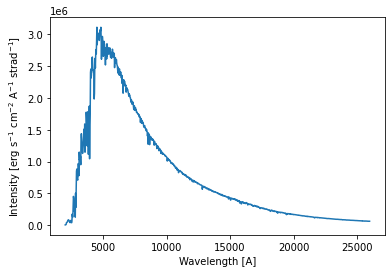

In [7]:
wl, flux = np.loadtxt(run_dir + '/spectrum.dat', delimiter = ',', unpack = True, usecols = [0, 1])

# Bin the spectrum for visualization purposes (defaults to 1000 bins)
wl, flux = atlas.bin_spec(wl, flux)

plt.plot(wl, flux, '-')
plt.xlabel('Wavelength [A]')
plt.ylabel('Intensity [erg s$^{-1}$ cm$^{-2}$ A$^{-1}$ strad$^{-1}$]')